# Support Vector Machine (SVM)

### Definition
- **SVM**: 분류 혹은 회귀 문제에 사용할 수 있는 알고리즘. 대부분 분류 문제에 사용.
- 두 데이터 집단을 잘 구분하는 Optimal Hyperplane (최적 초평면)을 찾음.
- **Margin**: 초평면 가까이에 있는 Support vector에서 hyperplane까지 거리의 합. 
- Margin에 있는 Support vector들을 maximize하는 hyperplane을 찾는 optimization problem.

### Linear & non-linear
- Kernel trick을 사용. Kernel을 통해 차원을 변경시 흩어진 데이터도 차원을 변경하여 간단하게 나눌 수 있음
    - Linear Kernel
    - Polynomial Kernel
    - Radial Basis Function


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

%matplotlib inline


Load Iris Dataset

In [2]:
iris = datasets.load_iris()

In [5]:
print(iris.keys(), '\n', iris.data.shape, '\n', iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 
 (150, 4) 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Train SVM

In [19]:
# iris data 중 septal length, septal width만 가져옴
x = iris.data[:,:2]
y = iris.target
SVM = svm.SVC(kernel='rbf', C=1, gamma=10 ).fit(x,y)

# Plot 의 min, max, mashgrid 만들기
x_min, x_max = x[:,0].min() -1, x[:,0].max() +1
y_min, y_max = x[:,1].min() -1, x[:,1].max() +1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

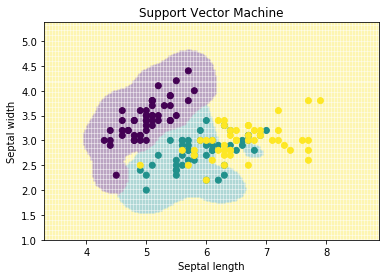

정확도:  0.84


In [20]:
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy, z, alpha=0.1)
plt.scatter(x[:,0],x[:,1],c=y)

plt.xlabel('Septal length')
plt.ylabel('Septal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도: ',SVM.score(X=x, y=y))